# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [7]:
# loading the data from github
import pandas as pd

!wget https://raw.githubusercontent.com/bs2537/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv

--2019-09-10 22:46:45--  https://raw.githubusercontent.com/bs2537/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17574 (17K) [text/plain]
Saving to: ‘persons.csv.1’

persons.csv.1       100%[===================>]  17.16K  --.-KB/s    in 0.003s  

2019-09-10 22:46:46 (4.82 MB/s) - ‘persons.csv.1’ saved [17574/17574]



In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/bs2537/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv", error_bad_lines= False)
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [38]:
# finding null values
df.isna().sum()

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64

In [39]:
# shape of data
df.shape

(1200, 4)

In [40]:
# summary statistics
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
# selecting only age, weight and exercise time from the dataframe and dropping the id column (which is spurious)

df[['age', 'weight', 'exercise_time']]

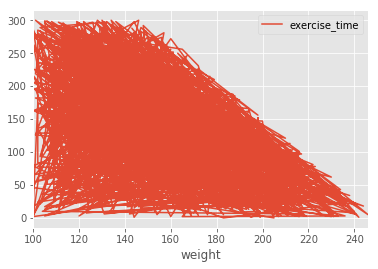

In [55]:
# plotting using matplotlib and seaborn style

import matplotlib as plt
import seaborn

df.plot(x='weight', y='exercise_time')

# There seems to some inverse correlation between these two variables from the plot below which is understandable
# People who have more exercise time are expected to have lower weight
# from the plot, the inverse correlation starts at weights higher than 140 pounds.


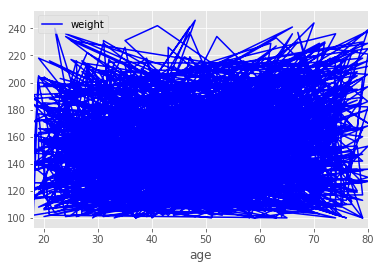

In [61]:
# next I want to see if age has any effect on increase in weight

df.plot(x='age', y='weight', color='b')

#There does not seem to be a correlation between these two variables

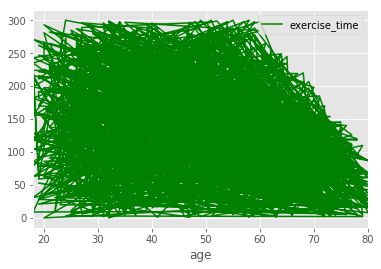

In [66]:
# next I want to see if age has any effect on exercise time (maybe older people do less exercise????)


df.plot(x='age', y='exercise_time', color='g')

# it seems like as persons grow older above age 57-58 years, they start doing less exercise from this plot

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. The id variable is ordinal, weight, age and exercise time are numerical.
2. The relationships between variables are mentioned under the notes in the code columns above.
3. Relationship between weight and exercise time appears real from the plot. There also seems to be a relation between age and exercise time after a certain age as mentioned in the comments. The relationship between age and weight is spurious.

To find the statistical signficance of the relationship between these variables and find p value, I will have to run linear regression which I will do later today.


In [0]:
# Linear regression between weight and exercise time

import numpy as np
from sklearn.linear_model import LinearRegression

In [81]:

X = df[['weight']].as_matrix()
print (X)






[[118]
 [161]
 [128]
 ...
 [147]
 [149]
 [154]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [83]:
Y = df[['exercise_time']].as_matrix().reshape(-1, 1)
print (Y)

[[192]
 [ 35]
 [220]
 ...
 [ 15]
 [185]
 [ 84]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [100]:
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print ('Coefficient of determination, R2:', r_sq)

Coefficient of determination, R2: 0.22850439235424758


The R2 is not very high, so not a very strong relationship but to find the degree of statistical significance, we have to find the p value and the confidence intervals. I will do these later, but will first find the model intercept and model coefficient.


In [99]:
regr = LinearRegression()
model = regr.fit(X, Y)
print('model intercept', model.intercept_)
print ('model coefficient', model.coef_)


model intercept [313.63383368]
model coefficient [[-1.16400958]]


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)